**ASSIGNMENT SUBMISSION DEADLINE: 03/09/2020 23:59**
- The functions to be implemented are given in 'transform.py', along with the instructions and grade points for each function.
- The test images are given in folder /inputs and sample outputs are provided in /output
- Most of these functions are available in build-in libraries, but you are not allowed to use them in this assignment, only numpy is allowed.

**Attention**:
- Please use python with version = 3.5.4 (>3.5.4 should be OK), and install the libs provided in requirements.txt via 'pip install -r requirements.txt'.
- Please do not change the inputs arguments of the functions in transform.py, otherwise your implementation would fail to pass the test.
- After you implement one function, you may have to restart the notebook kernel to help it recognize your fresh code.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.version)
print(sys.executable)
import matplotlib.pyplot as plt
from transform import *


image = load_image('inputs/lena_color.jpg')
image_data_file = 'output/image.npy'
# np.save(image_data_file, image)
test_image = np.load(image_data_file)
if np.max(np.abs(test_image - image)) < 1e-10:
    print("Your environment is OK")
else:
    print('Your environment is incorrect')

3.5.4 |Continuum Analytics, Inc.| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]
D:\Anaconda3\envs\CS4243\python.exe
Your environment is OK


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


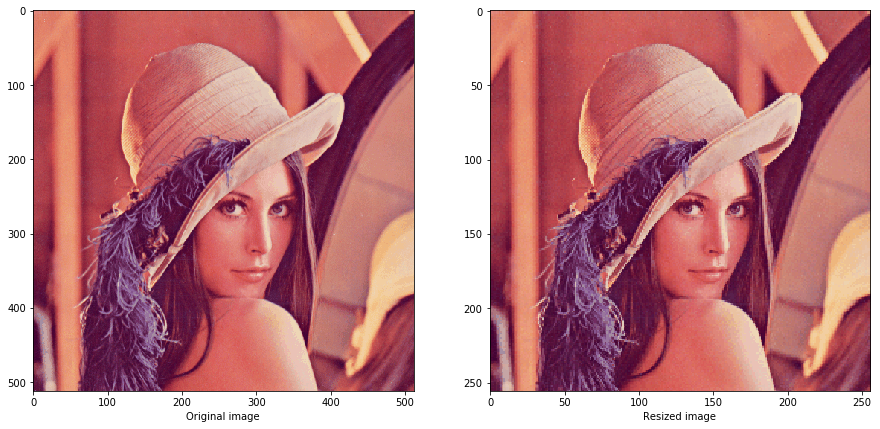

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
img = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
img_resize = cs4243_resize(img, 9,9)
"""
output:
[[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]]
"""

image = load_image('inputs/lena_color.jpg')
image_resize = cs4243_resize(image, 256, 256)

plt.subplot(121)
plt.imshow(image)
plt.xlabel('Original image')
plt.subplot(122)
plt.imshow(image_resize)
plt.xlabel('Resized image')
plt.show()

image_resize_sample_file = 'output/image_resize_sample.npy'
image_resize_sample = np.load(image_resize_sample_file)
assert np.max(np.abs(image_resize_sample - image_resize)) < 1e-10, "Your solution is incorrect."

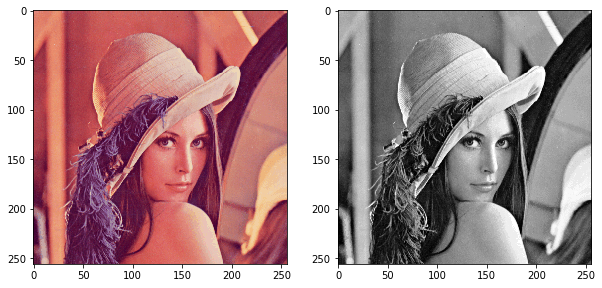

In [3]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

image_resize_sample_file = 'output/image_resize_sample.npy'
image_resize_sample = np.load(image_resize_sample_file)

image_grey = cs4243_rgb2grey(image_resize_sample)

plt.subplot(121)
plt.imshow(image_resize)
plt.subplot(122)
plt.imshow(image_grey)
plt.show()

image_grey_sample_file = 'output/image_grey_sample.npy'
image_grey_sample = np.load(image_grey_sample_file)
assert np.max(np.abs(image_grey_sample - image_grey)) < 1e-10, "Your solution is incorrect."

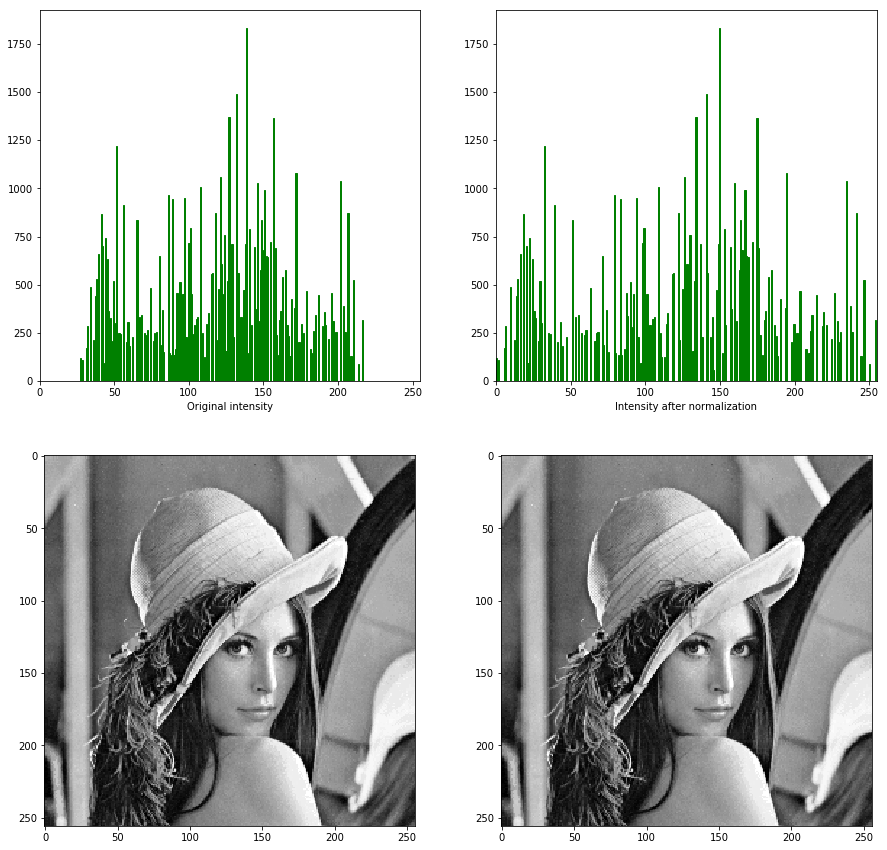

In [4]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

image_grey_sample_file = 'output/image_grey_sample.npy'
image_grey_sample = np.load(image_grey_sample_file)
image_sample = (image_grey_sample*255).astype('uint8')

res_image = cs4243_histnorm(image_sample)


plt.subplot(221)
plt.hist(image_sample.ravel(), bins=256, rwidth=0.8,range=(0, 255), fc='g', ec='g')
plt.xlim(0, 255)
plt.xlabel('Original intensity')
plt.subplot(222)
plt.hist(res_image.ravel(), bins=256, rwidth=0.8,range=(0, 255), fc='g', ec='g')
plt.xlabel('Intensity after normalization')
plt.xlim(0, 255)

plt.subplot(223)
plt.imshow(image_sample)
plt.subplot(224)
plt.imshow(res_image)
plt.show()
plt.show()


histnorm_image_grey_sample_file = 'output/histnorm_image_grey_sample.npy'
histnorm_image_grey_sample = np.load(histnorm_image_grey_sample_file)
assert np.max(np.abs(histnorm_image_grey_sample - res_image)) < 1e-10, "Your solution is incorrect."

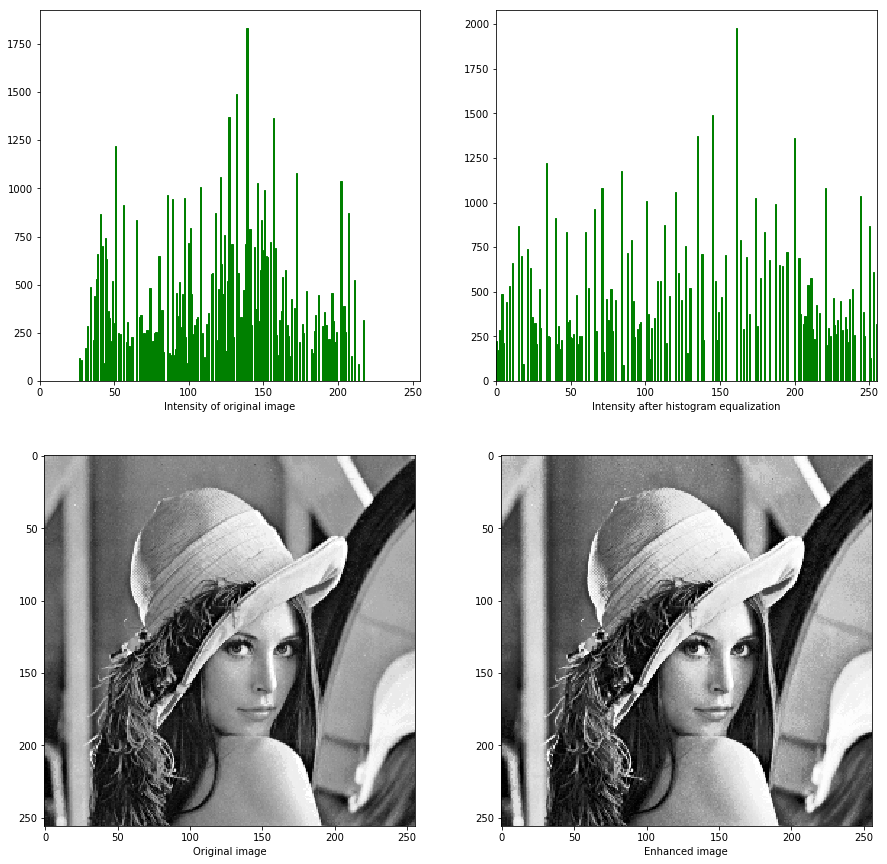

In [5]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

image_grey_sample_file = 'output/image_grey_sample.npy'
image_grey_sample = np.load(image_grey_sample_file)

image_sample = (image_grey_sample*255).astype('uint8')
hist_ori, cum_hist, res_image, hist_uni = cs4243_histequ(image_sample)


plt.subplot(221)
plt.bar(range(256),hist_ori, fc='g', ec='g')
plt.xlim(0, 255)
plt.xlabel('Intensity of original image')
plt.subplot(222)
plt.bar(range(256),hist_uni, fc='g', ec='g')
plt.xlim(0, 255)
plt.xlabel('Intensity after histogram equalization')
plt.subplot(223)
plt.imshow(image_grey_sample)
plt.xlabel('Original image')
plt.subplot(224)
plt.imshow(res_image)
plt.xlabel('Enhanced image')
plt.show()

uniform_image_grey_sample_file = 'output/uniform_image_grey_sample.npy'
uniform_image_grey_sample = np.load(uniform_image_grey_sample_file)
assert np.max(np.abs(uniform_image_grey_sample - res_image)) < 1e-10, "Your solution is incorrect."

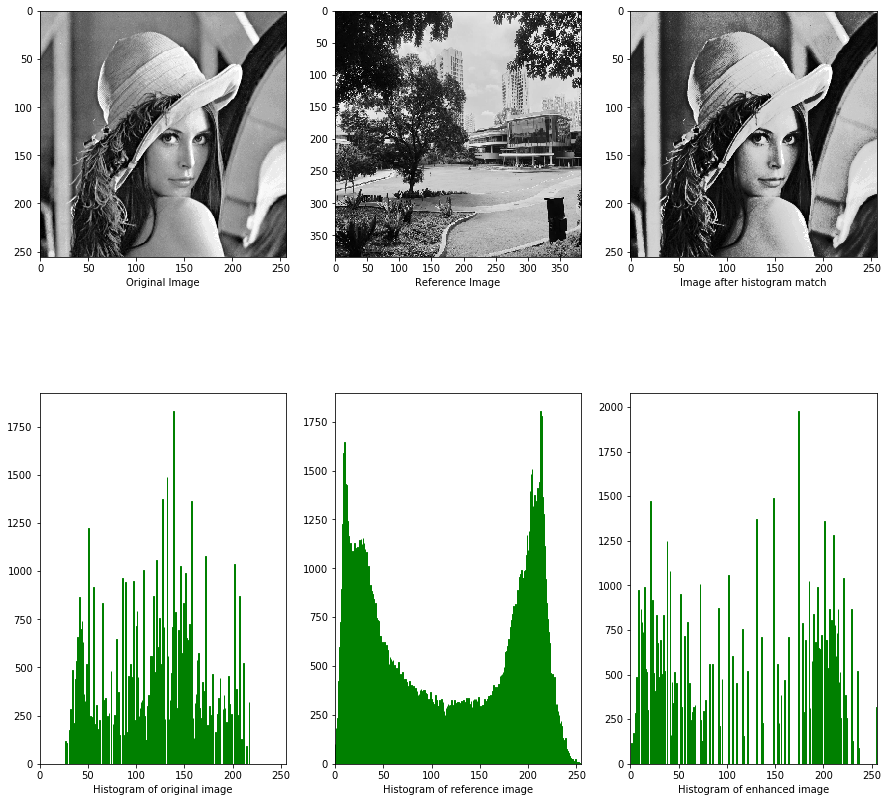

In [6]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

image_grey_sample_file = 'output/image_grey_sample.npy'
image_grey_sample = np.load(image_grey_sample_file)

image_grey_refer_file = 'inputs/utown.jpg'
uimage = load_image(image_grey_refer_file)
uimage_resize = cs4243_resize(uimage, 384, 384)
refer_image = cs4243_rgb2grey(uimage_resize)
plt.subplot(231)
plt.imshow(image_grey_sample)
plt.xlabel('Original Image')
plt.subplot(232)
plt.imshow(refer_image)
plt.xlabel('Reference Image')

image_sample = (image_grey_sample*255).astype('uint8')
refer_image = (refer_image*255).astype('uint8')

hist_ori, hist_ref, res_image, hist_res = cs4243_histmatch(image_sample, refer_image)
plt.subplot(233)
plt.imshow(res_image)
plt.xlabel('Image after histogram match')
plt.subplot(234)
plt.bar(range(256),hist_ori, fc='g', ec='g')
plt.xlim(0, 255)
plt.xlabel('Histogram of original image')
plt.subplot(235)
plt.bar(range(256),hist_ref, fc='g', ec='g')
plt.xlim(0, 255)
plt.xlabel('Histogram of reference image')
plt.subplot(236)
plt.bar(range(256),hist_res, fc='g', ec='g')
plt.xlim(0, 255)
plt.xlabel('Histogram of enhanced image')
plt.show()


histmatch_image_grey_sample_file = 'output/histmatch_image_grey_sample.npy'
#if you are using Mac, uncomment the line below to use reference outputs on Mac
#histmatch_image_grey_sample_file = 'output/histmatch_image_grey_sample_mac.npy'
histmatch_image_grey_sample = np.load(histmatch_image_grey_sample_file)
assert np.max(np.abs(histmatch_image_grey_sample - res_image)) < 1e-10, "Your solution is incorrect."

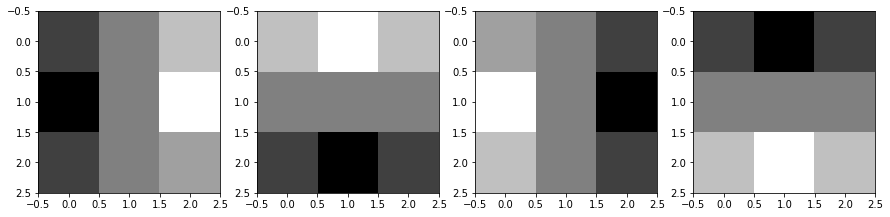

In [7]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

kernel_1 = np.array([[-1,0,1],[-2, 0, 2], [-1, 0, 0.5]])
kernel_2 = np.array([[1,2,1],[0, 0, 0], [-1, -2, -1]])
kernel_3 = cs4243_rotate180(kernel_1)
kernel_4 = cs4243_rotate180(kernel_2)

plt.subplot(141)
plt.imshow(kernel_1)

plt.subplot(142)
plt.imshow(kernel_2)

plt.subplot(143)
plt.imshow(kernel_3)

plt.subplot(144)
plt.imshow(kernel_4)
plt.show()

kernel_rotate_sample_file = 'output/kernel_rotate_sample.npy'
kernel_rotate_sample = np.load(kernel_rotate_sample_file)
assert np.max(np.abs(kernel_rotate_sample - kernel_3)) < 1e-10, "Your solution is incorrect."

Same kernel.


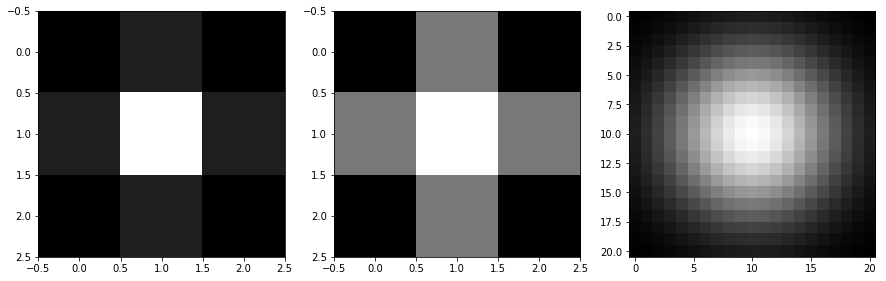

In [8]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

kernel_ks3_sig05 = cs4243_gaussian_kernel(3, 0.5)
kernel_ks3_sig2 = cs4243_gaussian_kernel(3, 2)
kernel_ks21_sig5 = cs4243_gaussian_kernel(21, 5)

kernel_ks3_sig2_rotate = cs4243_rotate180(kernel_ks3_sig2)
if np.max(np.abs(kernel_ks3_sig2 - kernel_ks3_sig2_rotate)) < 1e-10:
    print("Same kernel.")

plt.subplot(131)
plt.imshow(kernel_ks3_sig05)

plt.subplot(132)
plt.imshow(kernel_ks3_sig2)

plt.subplot(133)
plt.imshow(kernel_ks21_sig5)
plt.show()


gaussian_kernel_sample_file = 'output/gaussian_kernel_sample_ks3_sig2.npy'
gaussian_kernel_sample = np.load(gaussian_kernel_sample_file)
assert np.max(np.abs(gaussian_kernel_sample - kernel_ks3_sig2)) < 1e-10, "Your solution is incorrect."

gaussian_kernel_sample_file21 = 'output/gaussian_kernel_sample_ks21_sig5.npy'
gaussian_kernel_sample = np.load(gaussian_kernel_sample_file21)
assert np.max(np.abs(gaussian_kernel_sample - kernel_ks21_sig5)) < 1e-10, "Your solution is incorrect."

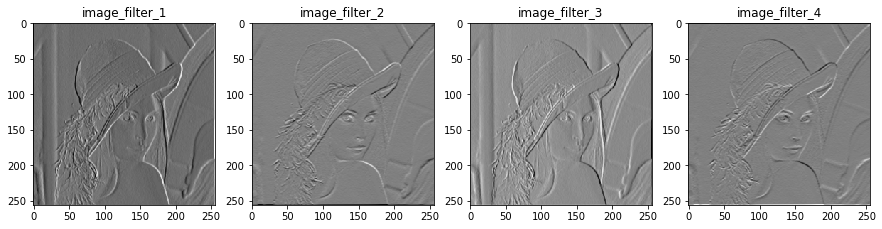

In [9]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

image_grey_sample_file = 'output/image_grey_sample.npy'
image_grey_sample = np.load(image_grey_sample_file)

image_filter_1 = cs4243_filter(image_grey_sample, kernel_1)
image_filter_2 = cs4243_filter(image_grey_sample, kernel_2)
image_filter_3 = cs4243_filter(image_grey_sample, kernel_3)
image_filter_4 = cs4243_filter(image_grey_sample, kernel_4)


plt.subplot(141)
plt.imshow(image_filter_1)
plt.title('image_filter_1')

plt.subplot(142)
plt.imshow(image_filter_2)
plt.title('image_filter_2')

plt.subplot(143)
plt.imshow(image_filter_3)
plt.title('image_filter_3')

plt.subplot(144)
plt.imshow(image_filter_4)
plt.title('image_filter_4')

plt.show()

image_filter_sample_file = 'output/image_filter_sample.npy'
image_filter_sample = np.load(image_filter_sample_file)
assert np.max(np.abs(image_filter_sample - image_filter_1)) < 1e-10, "Your solution is incorrect."

Native 4 nested loop: 1.1161377429962158
Fast version: 0.5332419872283936
Faster version: 0.11486506462097168


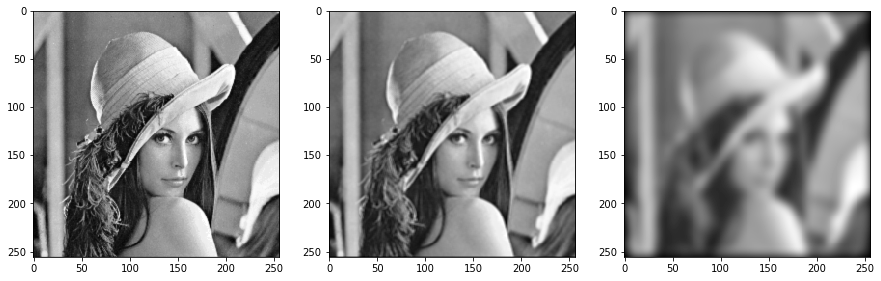

In [10]:
from transform import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import time

image_grey_sample_file = 'output/image_grey_sample.npy'
image_grey_sample = np.load(image_grey_sample_file)

kernel_ks3_sig05 = cs4243_gaussian_kernel(3, 0.5)
kernel_ks3_sig2 = cs4243_gaussian_kernel(3, 2)
kernel_ks21_sig5 = cs4243_gaussian_kernel(21, 5)

t1 = time.time()
image_filter_ks3_sig05 = cs4243_filter(image_grey_sample, kernel_ks3_sig05)
t2 = time.time()
image_filter_ks3_sig2_fast = cs4243_filter_fast(image_grey_sample, kernel_ks3_sig2)
t3 = time.time()
image_filter_ks3_sig2_faster = cs4243_filter_faster(image_grey_sample, kernel_ks3_sig2)
t4 = time.time()

image_filter_ks21_sig5 = cs4243_filter_faster(image_grey_sample, kernel_ks21_sig5)


print('Native 4 nested loop: {}'.format(t2-t1))
print('Fast version: {}'.format(t3-t2))
print('Faster version: {}'.format(t4-t3))

plt.subplot(131)
plt.imshow(image_filter_ks3_sig05)

plt.subplot(132)
plt.imshow(image_filter_ks3_sig2_fast)

plt.subplot(133)
plt.imshow(image_filter_ks21_sig5)
plt.show()

image_filter_fast_sample_file = 'output/image_filter_fast_sample_ks3_sig2.npy'
image_filter_fast_sample = np.load(image_filter_fast_sample_file)
assert np.max(np.abs(image_filter_fast_sample - image_filter_ks3_sig2_fast)) < 1e-10, "Your solution is incorrect."


image_filter_faster_sample_file = 'output/image_filter_faster_sample_ks3_sig2.npy'
image_filter_faster_sample = np.load(image_filter_faster_sample_file)
assert np.max(np.abs(image_filter_faster_sample - image_filter_ks3_sig2_faster)) < 1e-10, "Your solution is incorrect."

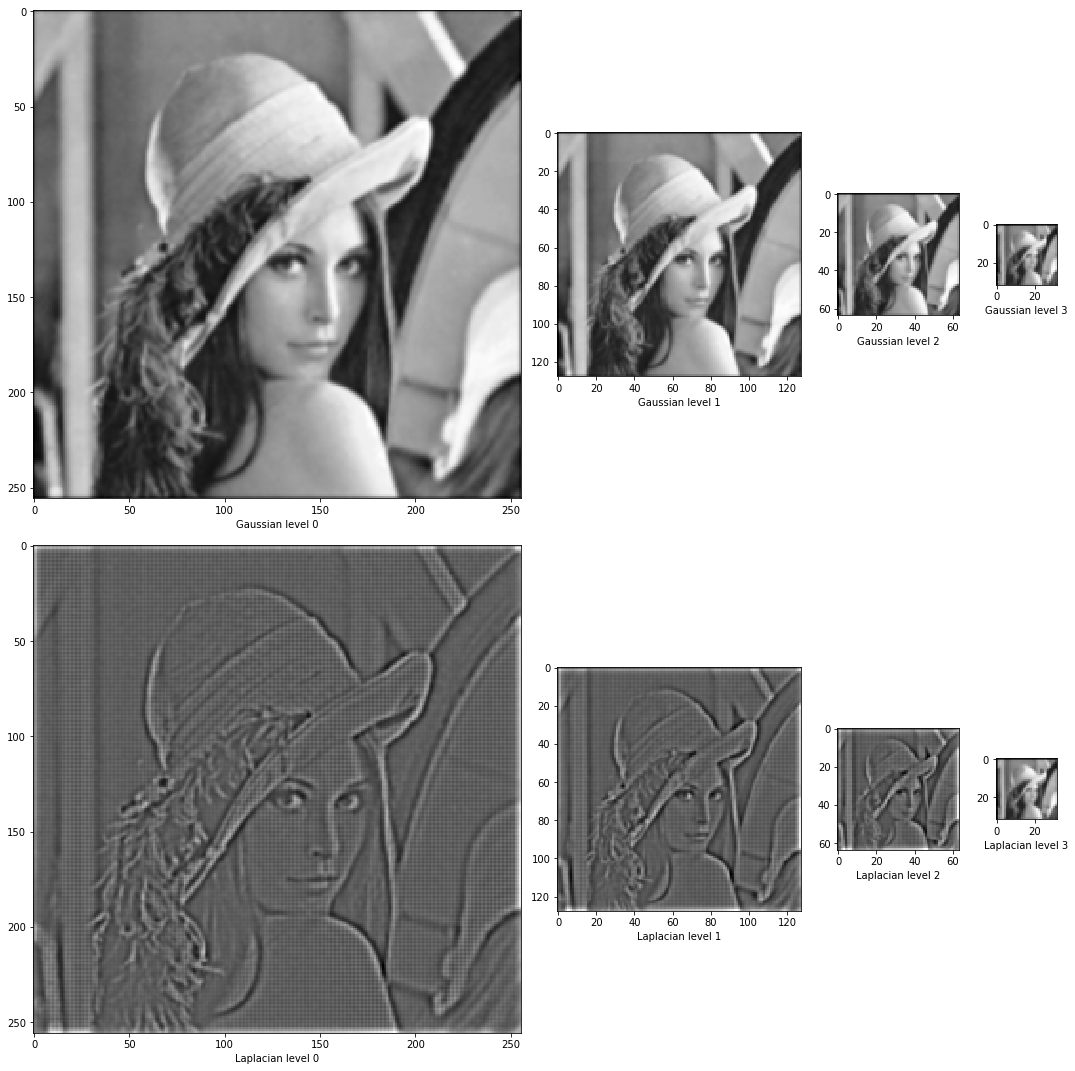

In [11]:
from transform import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

gs = gridspec.GridSpec(2, 4, width_ratios=[8, 4, 2, 1])

image_grey_sample_file = 'output/image_grey_sample.npy'
image_grey_sample = np.load(image_grey_sample_file)

gauss_pyramid = cs4243_gauss_pyramid(image_grey_sample, 4)
for i in range(4):
    ax = plt.subplot(gs[i])
    ax.imshow(gauss_pyramid[i])
    plt.xlabel('Gaussian level {}'.format(i))

lap_pyramid = cs4243_lap_pyramid(gauss_pyramid) # constructed from Gaussian Pyramid
for i in range(4):
    ax = plt.subplot(gs[4+i])
    ax.imshow(lap_pyramid[4-1-i])
    plt.xlabel('Laplacian level {}'.format(i))

plt.tight_layout()
plt.show()

Gaussian_level_1_file = 'output/Gaussian_level_1.npy'
Gaussian_level_1 = np.load(Gaussian_level_1_file)
assert np.max(np.abs(Gaussian_level_1 - gauss_pyramid[1])) < 1e-10, "Your solution is incorrect."

Laplacian_level_1_file = 'output/Laplacian_level_1.npy'
Laplacian_level_1 = np.load(Laplacian_level_1_file)
assert np.max(np.abs(Laplacian_level_1 - lap_pyramid[4-1-1])) < 1e-10, "Your solution is incorrect."

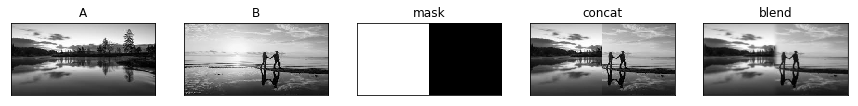

In [12]:
from transform import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

left = load_image('inputs/left_1.jpg')
right = load_image('inputs/right_1.jpg')
height, width = 256, 512
left_resize = cs4243_resize(left, width, height)
right_resize = cs4243_resize(right, width, height)
A = cs4243_rgb2grey(left_resize)
B = cs4243_rgb2grey(right_resize)

mask = np.zeros_like(A)
mask[:, :width//2]=1
#linear combination
left_right = A*mask + B*(1.0-mask)

blend_image = cs4243_Lap_blend(A, B, mask)

image = [A, B, mask, left_right, blend_image]
title = ['A', 'B', 'mask', 'concat', 'blend']
for i in range(5):
    ind = 151+i
    plt.subplot(ind)
    plt.imshow(image[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(title[i])

plt.show()

blend_image_file = 'output/blend_image.npy'
# If you are using Mac, uncommont the line below to use reference output on Mac
# blend_image_file = 'output/blend_image_mac.npy'
blend_image_sample = np.load(blend_image_file)
assert np.max(np.abs(blend_image_sample - blend_image)) < 1e-10, "Your solution is incorrect."